# プロジェクト

配点
- Q1 required 50P
- Q2 optional

In [1]:
import pandas as pd
import numpy as  np
import csv
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix,  accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot  as plt
%matplotlib inline

# 必要なモジュールがあれば適宜追加してください

## Q1
UCI Machine Learning Repositoryに公開されているワインの品質データセットを用いて、ワインの理化学検査結果に基づく特徴量からワインの品質を予測することを考えます。

以下では***白ワイン***のデータセットを使用します。（赤ワインのデータセットではないことに注意してください）

[Wine Quality Data Set ](https://archive.ics.uci.edu/ml/datasets/wine+quality)

各ワインのデータは以下の11種類の特徴量からなります。
- 1 - fixed acidity : 不揮発酸濃度（ほぼ酒石酸濃度）
- 2 - volatile acidity : 揮発酸濃度（ほぼ酢酸濃度）
- 3 - citric acid : クエン酸濃度
- 4 - residual sugar : 残存糖濃度
- 5 - chlorides : 塩化物濃度
- 6 - free sulfur dioxide : 遊離亜硫酸濃度
- 7 - total sulfur dioxide : 亜硫酸濃度
- 8 - density : 密度
- 9 - pH : pH
- 10 - sulphates : 硫酸塩濃度
- 11 - alcohol : アルコール度数
- 12 - quality (score between 0 and 10) : 0-10 の値で示される品質のスコア

また、各ワインには0から10の品質スコアが付与さています。11種類の特徴量を元にワインの品質を高品質（ワインのqualityが6以上）、低品質（ワインのqualityが6未満）の2値にして予測する2クラス分類問題を考えます。

データ分析の実践のノートブック（practical_ds.ipynb）を参考に、以下に従ってワインの品質を2クラス分類として予測するモデルの学習と評価を行う一連のコードを実装しその実行結果を表示した上で、以下の各Qについて考察を記述してください。その他に工夫した点があればそれについても記述をしてください。授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

- データの観察・前処理
    - ***Q. それぞれの特徴量の記述統計量、ばらつき・分布はどのようになっているでしょうか***（3P）
    - ***Q. 欠損値、外れ値、重複データの処理は必要でしょうか***（3P）
    - ***Q. 特徴量間の相関はどのようになっているでしょうか***（3P）

- モデルの学習
    - データセットを訓練データとテストデータに分けます。テストデータは最終的に選択したモデルの評価に使います。訓練データは交差検証に使いモデルの選択と評価を行います。
    - ワインの品質を2クラス分類として予測するためのモデルとしてロジスティック回帰を考えます
    - 単純な特徴量を元に、モデルの基本となる精度を確認しましょう
         - ***Q. 単純なモデルとしてどのような特徴量を使うのがよいでしょうか***（3P）
         - ***Q. どのような評価尺度を使うのがよいでしょうか***（3P）
             - accuracy, precision, recall, f値など
         - ***Q. 単純なモデルではどの程度の精度が期待できるでしょうか***（5P）
- モデルの選択と評価
    - モデルを複雑にして精度を向上させることを考えます
         - ***Q. どのような特徴量を作成・選択すればよいでしょうか***（5P）
             - 特徴量作成：非線形変換、交差項、多項式、ドメイン知識の利用など
             - 特徴量選択：探索、相関・情報量、モデルベースなど
         - 訓練データを交差検証に使い、モデルを評価し選択をしましょう（10P）
            - ***Q. どのような評価尺度を使うのがよいでしょうか***
                - accuracy, precision, recall, f値など
            - ***Q. どのようなモデルを選択しましたか。単純なモデルに比べてどれぐらい精度が向上したでしょうか。どのような要因で精度が向上したのでしょうか*** 
    - モデルの複雑性は適切でしょうか（5P）
        - ***Q. アンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないか確認しましょう***
        - ***Q. もしHigh BiasやHigh Varianceの場合はどのように対処すればよいでしょうか***
    - 最終的に選択したモデルをテストデータで評価しましょう（10P）
        - ***Q. 選択したモデルではどの程度の精度が期待できるでしょうか***
        - ***Q. 今回のモデルを実際にワイン工場で品質予測システムとして実展開するにはどのようなことを検討する必要があるでしょうか***
        
***上記は分類問題のため、モデルの評価は平均二乗誤差ではなく交差エントロピー誤差、またはaccuracy, precision, recall, f値などを用いることに注意してください。***

比較のためにその他のモデル（ランダムフォレスト、SVM、ニューラルネットワークなど）を使ってもらってもよいですが、それだけを持って大きく加点することはありません

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

### データの観察・前処理

- ***Q. それぞれの特徴量の記述統計量、ばらつき・分布はどのようになっているでしょうか***（3P）

plotと記述統計から、`residual sugar`値が少ないサンプルが多いとわかった。

- ***Q. 欠損値、外れ値、重複データの処理は必要でしょうか***（3P）

欠損値はありませんでした。重複データはありませんでした。
plotをした結果、少なくとも`total sulfur dioxide`, `alcohol`には外れ値がありそうだと判断したため、外れ値処理の必要があると判断しました。

- ***Q. 特徴量間の相関はどのようになっているでしょうか***（3P）

相関している特徴量はないと考えました。`alcohol`と`density`は（わかってはいましたが）逆相関していました。

* 変数について
  * X_ori...標準化する前のX
  * X...標準化したあとのX_ori

In [2]:
# 白ワインデータセットの読み込み
wine_ori = pd.read_csv("winequality-white.csv", sep=";")
wine_ori
#type(wine_ori) #pandas.core.frame.DataFrame

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8        6  
1         9.5        6  
2        10.1        6  
3         9.9        6  
4         9.9        6  
...       ...      ...  
4893     11.2        6  
4894      9.6        5  
4895      9.4        6  
4896     12.8        7  
4897     11.8        6  

[4898 rows x 12 columns]

In [3]:
# 欠損値なし
wine_ori.info(verbose=True) #すべて4898 non-null float64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [4]:
# 統計
wine_ori.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4898.000000  4898.000000  4898.000000  4898.000000  
mean      3.188267     0.489847    10.514267     5.877909  
std       0.151001     0.114126     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [5]:
wine_ori.dtypes
#y.dtypes #dtype('int64')

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [6]:
X_ori = wine_ori.drop('quality', axis=1)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0)
sel.fit(X_ori)

# get_supportで保持するデータのみをTrue値、そうでないものはFalse値を返します
print(sum(sel.get_support())== X_ori.shape[1]) #同じ特徴量は存在していないことがわかった

True


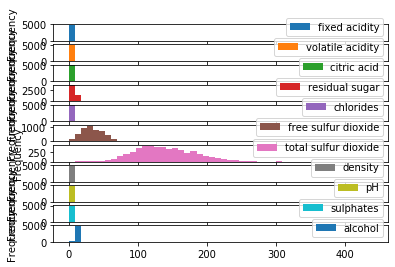

In [7]:
# 外れ値観察
X_ori.plot(kind='hist', bins=50, subplots=True);
#少なくともtotal sulfur dioxide, alcoholには外れ値がありそう

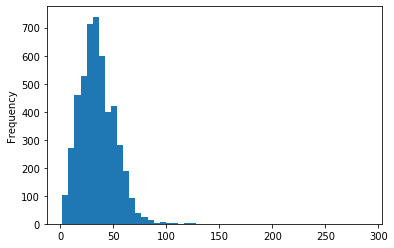

In [8]:
# stdが大きかったので観察してみた
wine_ori['free sulfur dioxide'].plot(kind='hist', bins=50, subplots=True);
# そこまで外れ値などはなさそう

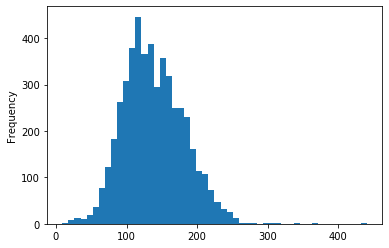

In [9]:
wine_ori['total sulfur dioxide'].plot(kind='hist', bins=50, subplots=True);

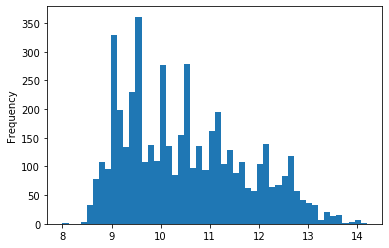

In [10]:
wine_ori['alcohol'].plot(kind='hist', bins=50, subplots=True);

In [11]:
#　外れ値を含むデータをなくす
def drop_outliers(df):
    for i in range(len(df.columns)):
        # 列を抽出する
        col = df.iloc[:,i]
        
        # 四分位数
        q1 = col.describe()['25%']
        q3 = col.describe()['75%']
        iqr = q3 - q1 ###四分位範囲を求めるコード ###
        
        # 外れ値の基準点
        outlier_min = q1 - iqr * 1.5
        outlier_max = q3 + iqr * 1.5

        # 範囲から外れている値を除く
        col[col < outlier_min] = None
        col[col > outlier_max] = None

    return df.dropna(how='any', axis=0)
        
drop_outliers(wine_ori)  # 関数呼び出して外れた値を含む行を除いたデータフレームを表示

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8      6.0  
1         9.5      6.0  
2        10.1      6.0  
3         9.9      6.0  
4         9.9      6.0  
...       ...      ...  
4893     11.2      6.0  
4894      9.6      5.0  
4895      9.4      6.0  
4896     12.8      7.0  
4897     11.8      6.0  

[3854 rows x 12 columns]

In [12]:
wine_ori.shape[0] - len(drop_outliers(wine_ori).index) #drop_outliers関数によって除かれたサンプル数

1144

In [13]:
wine_ori #サンプルが除かれていない

fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  quality  
0         8.8      6.0  
1         9.5      6.0  
2        10.1      6.0  
3         9.9      6.0  
4         9.9      6.0  
...       ...      ...  
4893     11.2      6.0  
4894      9.6      5.0  
4895      9.4      6.0  
4896     12.8      7.0  
4897     11.8      6.0  

[4898 rows x 12 columns]

In [14]:
#drop_outliers関数によって該当サンプルが除かれたwine_oriを新たにwineと定義する
wine = drop_outliers(wine_ori)

wine['class'] = [0 if i < 6 else 1 for i in wine['quality'].tolist()]
wine = wine.drop('quality', axis=1)
wine

/usr/local/Caskroom/miniconda/base/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.0              0.27         0.36            20.7      0.045   
1               6.3              0.30         0.34             1.6      0.049   
2               8.1              0.28         0.40             6.9      0.050   
3               7.2              0.23         0.32             8.5      0.058   
4               7.2              0.23         0.32             8.5      0.058   
...             ...               ...          ...             ...        ...   
4893            6.2              0.21         0.29             1.6      0.039   
4894            6.6              0.32         0.36             8.0      0.047   
4895            6.5              0.24         0.19             1.2      0.041   
4896            5.5              0.29         0.30             1.1      0.022   
4897            6.0              0.21         0.38             0.8      0.020   

      free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                    45.0                 170.0  1.00100  3.00       0.45   
1                    14.0                 132.0  0.99400  3.30       0.49   
2                    30.0                  97.0  0.99510  3.26       0.44   
3                    47.0                 186.0  0.99560  3.19       0.40   
4                    47.0                 186.0  0.99560  3.19       0.40   
...                   ...                   ...      ...   ...        ...   
4893                 24.0                  92.0  0.99114  3.27       0.50   
4894                 57.0                 168.0  0.99490  3.15       0.46   
4895                 30.0                 111.0  0.99254  2.99       0.46   
4896                 20.0                 110.0  0.98869  3.34       0.38   
4897                 22.0                  98.0  0.98941  3.26       0.32   

      alcohol  class  
0         8.8      1  
1         9.5      1  
2        10.1      1  
3         9.9      1  
4         9.9      1  
...       ...    ...  
4893     11.2      1  
4894      9.6      0  
4895      9.4      1  
4896     12.8      1  
4897     11.8      1  

[3717 rows x 12 columns]

In [15]:
y = wine['class']

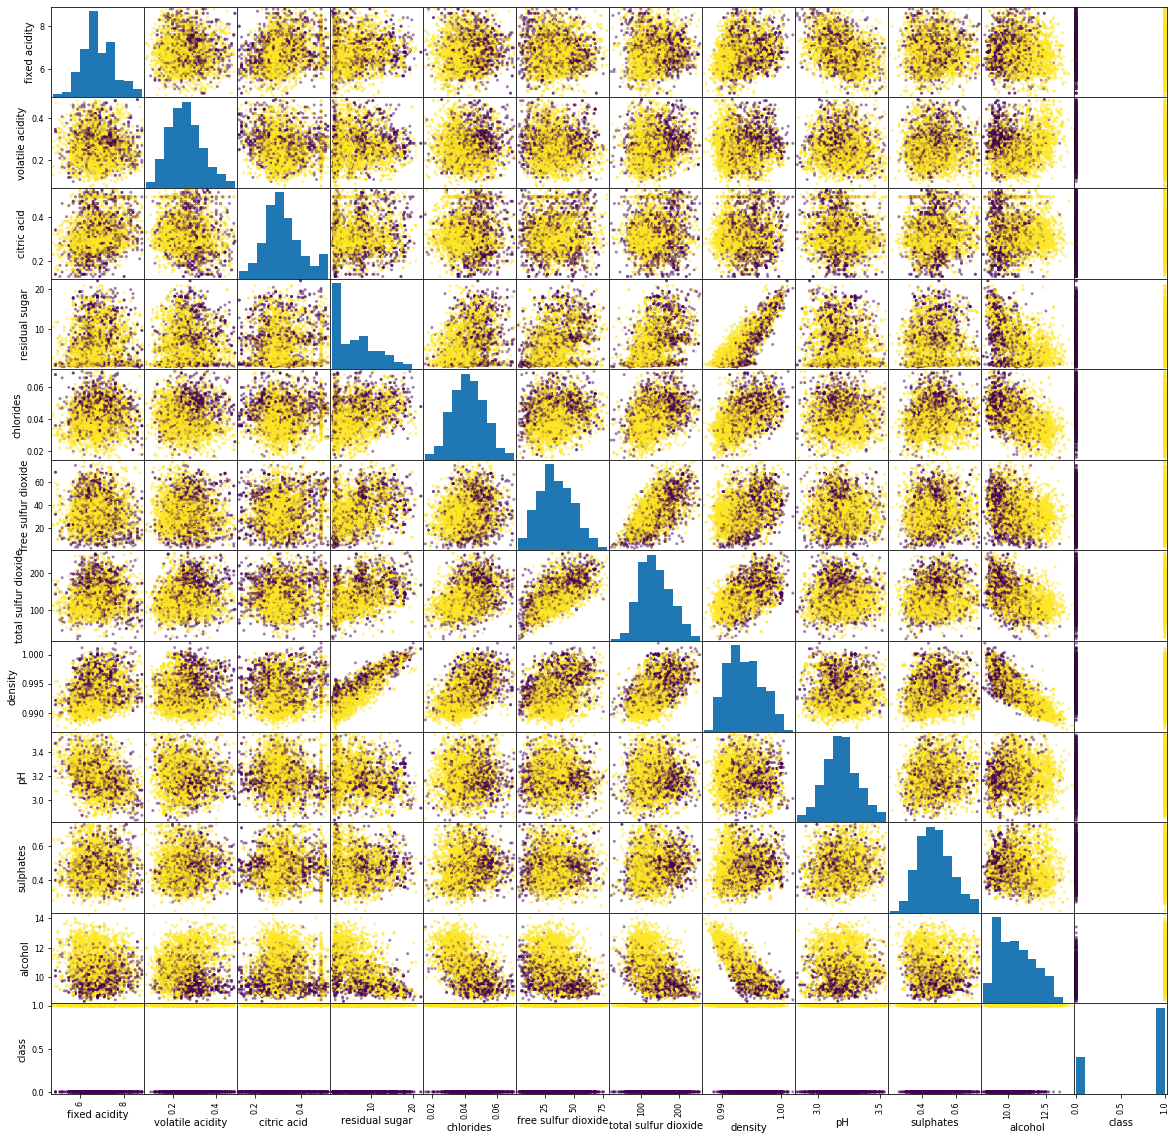

In [16]:
grr = pd.plotting.scatter_matrix(wine,  figsize=(20, 20),c = wine['class'])

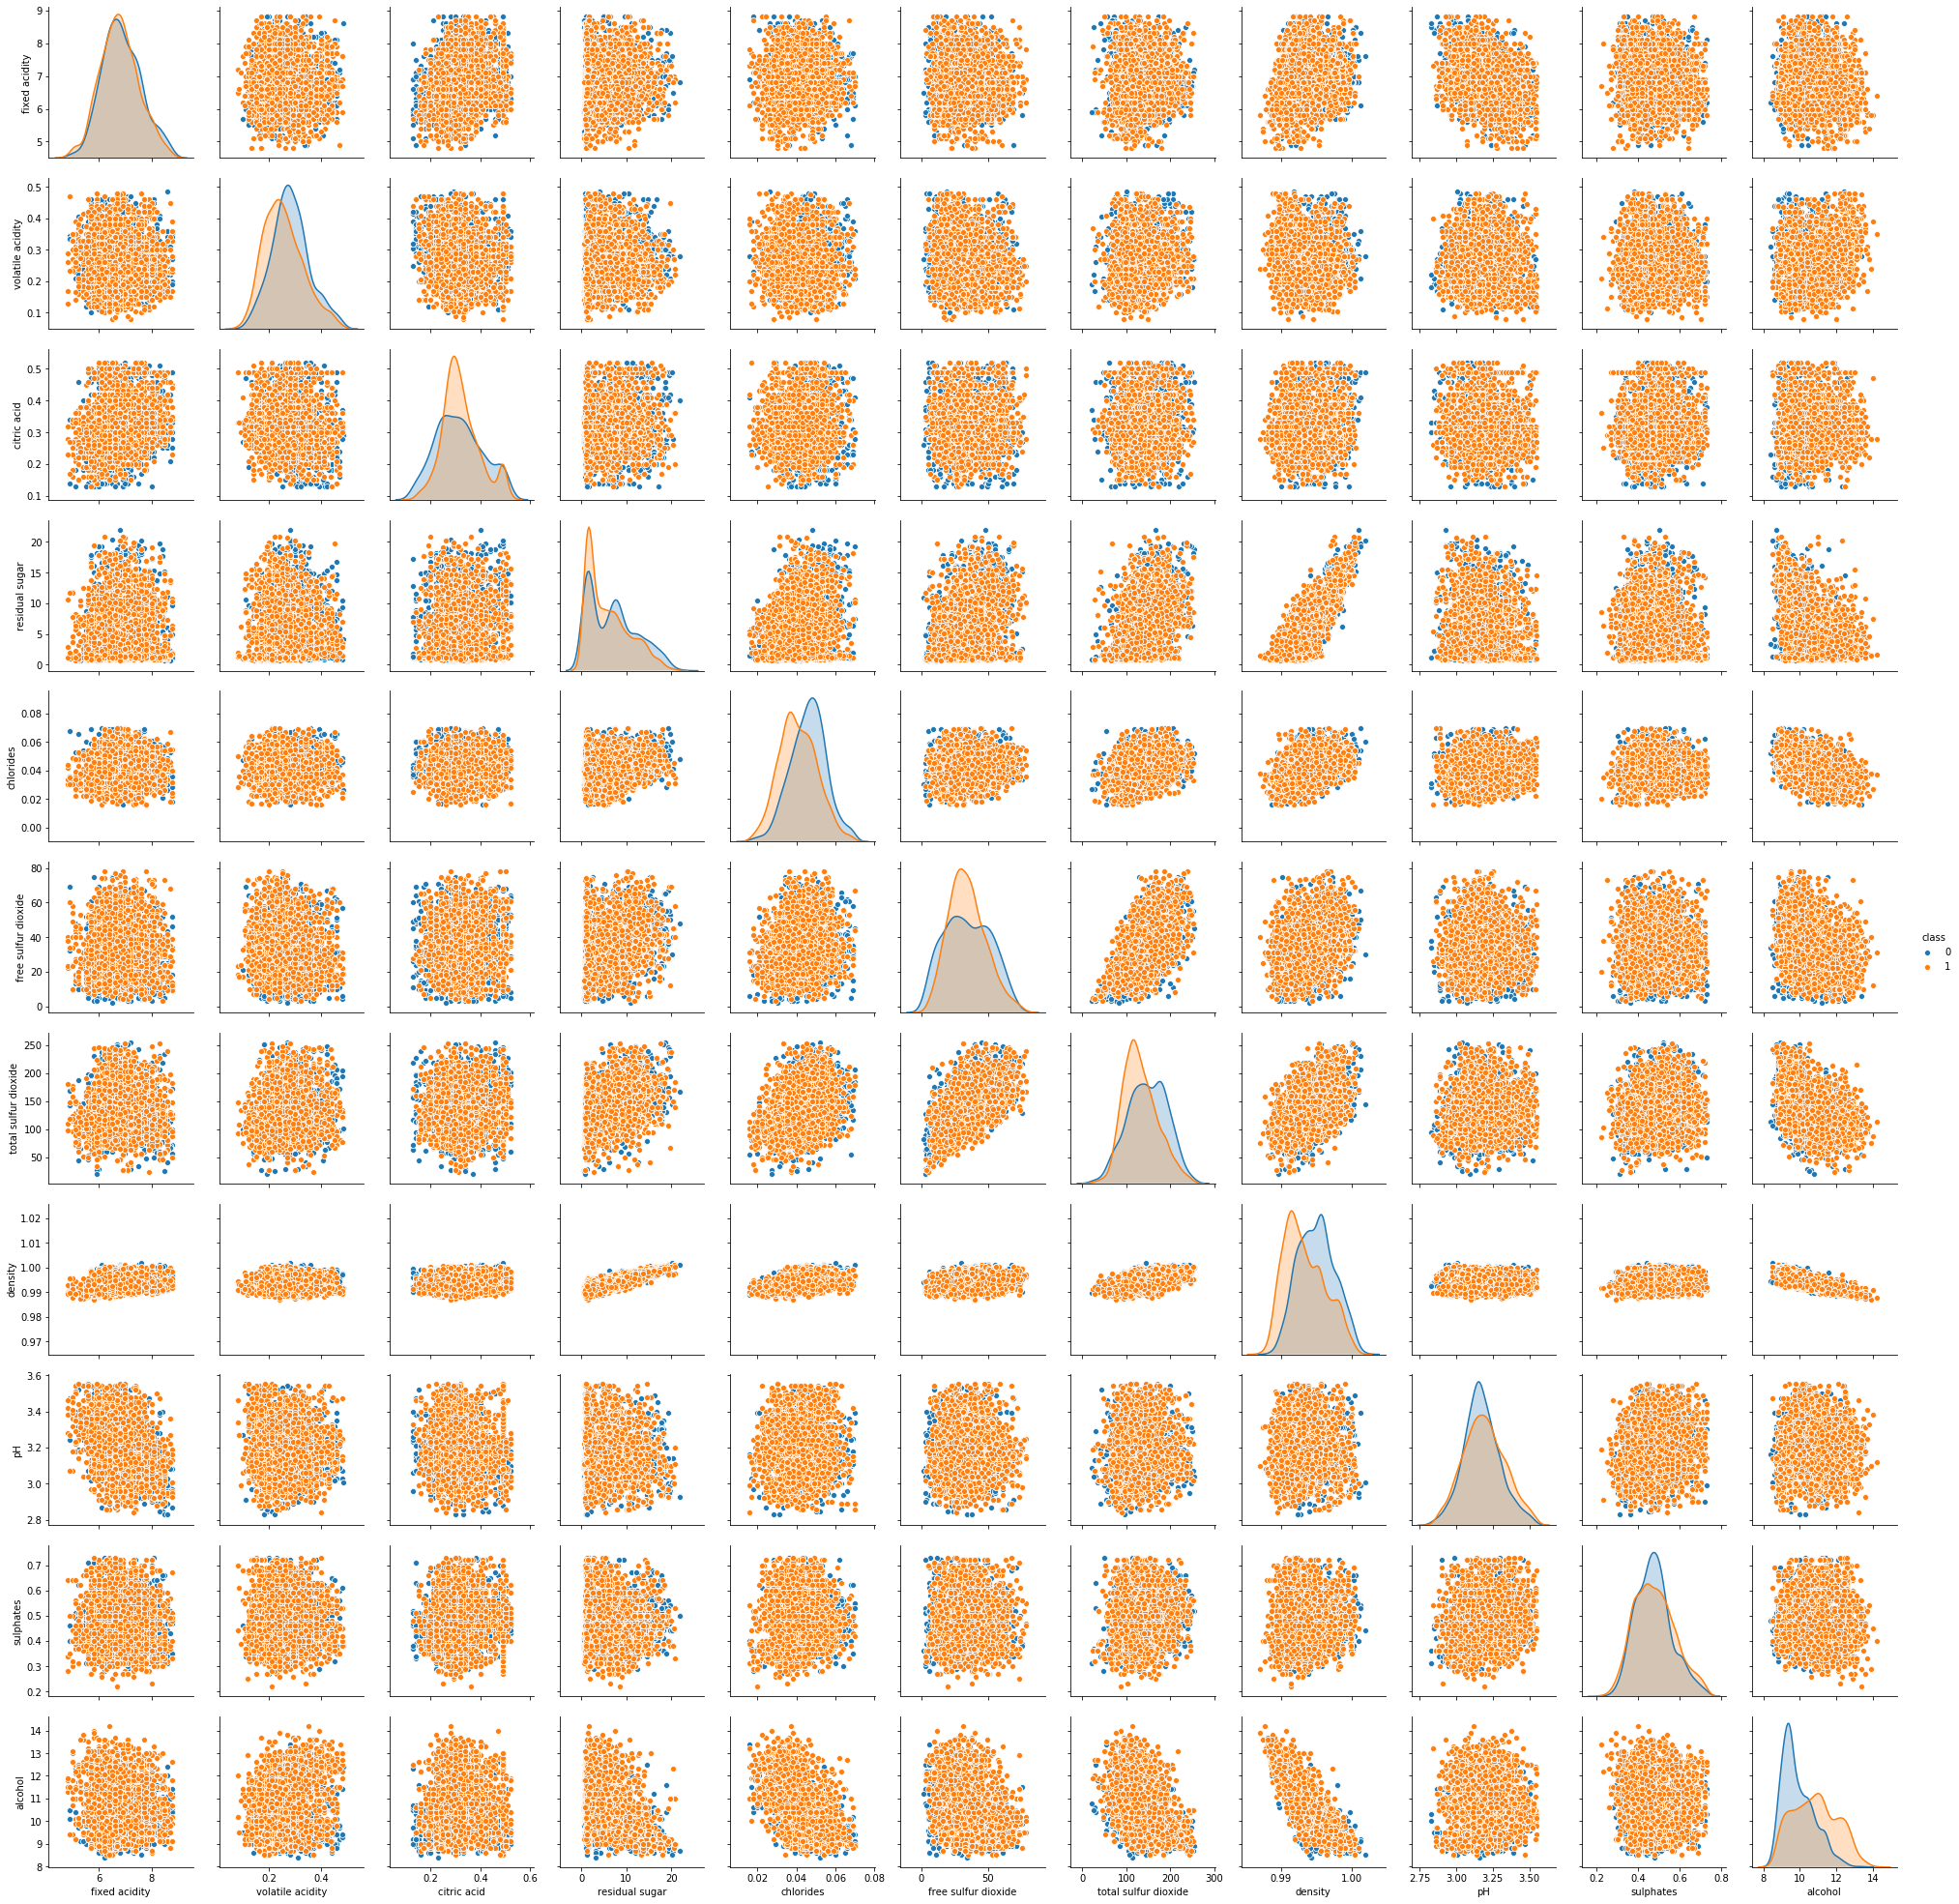

In [17]:
sns.pairplot(wine, vars=wine.columns[:-1], hue='class');

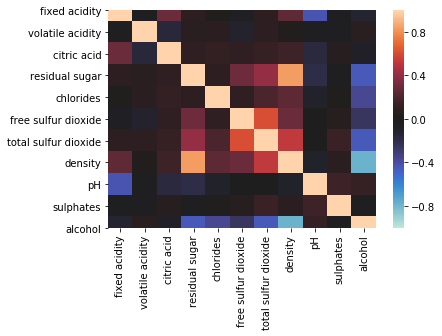

In [18]:
#各特徴量の相関関係(標準化前)
X_ori_corr = X_ori.corr()
X_ori_corr

sns.heatmap(X_ori_corr, vmax=1, vmin=-1, center=0)
plt.savefig('seaborn_heatmap_corr_example_ori.png')

In [19]:
# データの正規化[z-score normalization (標準化)]
X_ori = wine.drop('quality', axis=1)

X = X_ori.apply(lambda x: (x-x.mean())/x.std(), axis=0).fillna(0)
X.head()
X.describe()

KeyError: "['quality'] not found in axis"

In [ ]:
#各特徴量の相関関係(標準化後)
X_corr = X.corr()
X_corr

sns.heatmap(X_ori_corr, vmax=1, vmin=-1, center=0)
plt.savefig('seaborn_heatmap_corr_example.png')
# 前後であまり変化なし

In [ ]:
# 散布図行列
grr = pd.plotting.scatter_matrix(wine,  figsize=(20, 20),c = wine['class'])
#sns.pairplot(wine, vars=wine.columns[:-1], hue='class');
#sns.pairplot(wine, hue='class');

### モデルの学習
データセットを訓練データとテストデータに分けます。テストデータは最終的に選択したモデルの評価に使います。訓練データは交差検証に使いモデルの選択と評価を行います。ワインの品質を2クラス分類として予測するためのモデルとしてロジスティック回帰を考えます

***Q. 単純なモデルとしてどのような特徴量を使うのがよいでしょうか***（3P）

`alcohol`:単純なモデルとは、変数が一つのモデルと解釈した。結果`SelectKBest`から`alcohol`が選ばれた。また先に示した`sns.pairplot(wine, vars=wine.columns[:-1], hue='class');`の結果からも`alcohol`が一番貢献度が高いと判断できる。

***Q. どのような評価尺度を使うのがよいでしょうか(accuracy, precision, recall, f値など)***（3P）

`Accuracy`を使用しました。

***Q. 単純なモデルではどの程度の精度が期待できるでしょうか***（5P）

平均して`0,69`でした。

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(score_func=f_classif, k=1) #SelectKBest
selector.fit(X_train, y_train)
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)
mask = selector.get_support() #各特徴量を選択したか否かのmaskを取得
print(mask) #alcoholがTrue

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
from sklearn.model_selection import cross_val_score
ave_score = cross_val_score(lr, X_train_selected, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (ave_score.mean(), ave_score.std() * 2))

### モデルの選択と評価
#### モデルを複雑にして精度を向上させることを考えます
***Q. どのような特徴量を作成・選択すればよいでしょうか***（5P）

`volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, alcohol` を選択します。
 
##### 訓練データを交差検証に使い、モデルを評価し選択をしましょう（10P）

***Q. どのような評価尺度を使うのがよいでしょうか***

`Accuracy`を使用しました。

***Q. どのようなモデルを選択しましたか。単純なモデルに比べてどれぐらい精度が向上したでしょうか。どのような要因で精度が向上したのでしょうか*** 

モデルベース特徴量選択にて`RandomForest`を選びました。精度は`0.040000000000000036`上がりました。予測するのに必要な特徴量を考慮することができるようになったためだと考えます。

#### モデルの複雑性は適切でしょうか（5P）
***Q. アンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないか確認しましょう***

バイアスが```0.32186154302364556```、バリアンスが```0.01161108208978899```だと確認しました。よってアンダーフィッティング（High Bias）やオーバーフィッティング（High Variance）になっていないと判断しました

***Q. もしHigh BiasやHigh Varianceの場合はどのように対処すればよいでしょうか***

* バイアスが高かったら、モデルを複雑にします。具体的には特徴量を増やしたり、多項式であれば次数を増やします。あるいは正則化項係数を小さくしたりします。
* バリアンスが高かったら、モデルを簡潔にしたり、データセットを増やします。

#### 最終的に選択したモデルをテストデータで評価しましょう（10P）
***Q. 選択したモデルではどの程度の精度が期待できるでしょうか***

`Accuracy`が`0.7666666666666667`でした

***Q. 今回のモデルを実際にワイン工場で品質予測システムとして実展開するにはどのようなことを検討する必要があるでしょうか***

消費者からのフィードバック（例：評価が高かったが確かにおいしかった、評価が高いもののおいしくなかった）を常に取り入れることで、精度を上げていく

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# RandomForestで特徴量の重要度を元に選択し、ロジスティック回帰で教師あり学習をする
select = SelectFromModel(
    RandomForestClassifier(n_estimators=100, random_state=42),
    threshold="median")

select.fit(X_train, y_train)
X_train_l1 = select.transform(X_train)
print("X_train.shape: {}".format(X_train.shape))
print("X_train_l1.shape: {}".format(X_train_l1.shape))
mask = select.get_support() #各特徴量を選択したか否かのmaskを取得
print(mask)
#Trueなのはvolatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, alcohol 

ave_score_l1 = cross_val_score(lr, X_train_l1, y_train, cv=10)
#pd.DataFrame(ave_score_l1).rename(columns={0: '正解率'})
print("Accuracy: %0.2f (+/- %0.2f)" % (ave_score_l1.mean(), ave_score_l1.std() * 2))
#ave_score_l1.mean() #0.7322877826770842...多少上がった

In [ ]:
0.73-0.69

In [ ]:
from sklearn.decomposition import PCA
# データの最初の2つの主成分のみを維持する
pca = PCA(n_components=2)
# cancerデータセットにPCAを適合
pca.fit(X_train)

# 最初の2つの主成分に対してデータポイントを変換
X_train_pca = pca.transform(X_train)
print("Original shape: {}".format(str(X_train.shape)))
print("Reduced shape: {}".format(str(X_train_pca.shape)))

In [ ]:
plt.figure(figsize=(8, 8))

import mglearn
mglearn.discrete_scatter(X_train_pca[:, 0], X_train_pca[:, 1], y_train)
#plt.legend(wine.target_names, loc="best")
plt.gca().set_aspect("equal")
plt.xlabel("First principal component")
plt.ylabel("Second principal component")

ave_score_pca = cross_val_score(lr, X_train_pca, y_train, cv=10)
print("Accuracy: %0.2f (+/- %0.2f)" % (ave_score_pca.mean(), ave_score_pca.std() * 2))

In [ ]:
print(1-ave_score_pca.mean())

print(ave_score_pca.std())

#実データ／予測データのズレを平均したものがバイアスに相当します。
#実データ／予測データのズレのばらつきがバリアンスに相当します。

In [ ]:
X_test_l1 = select.transform(X_test)
X_test_l1

In [ ]:
#volatile acidity, residual sugar, free sulfur dioxide, total sulfur dioxide, density, alcohol だけを選び、予測する
lr.fit(X_train_l1, y_train) 
y_pred = lr.predict(X_test_l1)

print(confusion_matrix(y_test, y_pred)) # 混同行列
print(accuracy_score(y_test, y_pred)) # accuracy
print(precision_score(y_test, y_pred)) # precision適合率
print(recall_score(y_test, y_pred)) # recall再現率
print(f1_score(y_test, y_pred))  # f値

# 適合率と再現率 (Precision & Recall)はトレードオフ (Trade-Off) の関係になっています。
# 両者のバランスを定量化したものがF値 (F score)

## Q2
2019年度版のSSDSE（教育用標準データセット）のデータを元に、自分で仮説を設定した上で、その仮説を回帰、分類やクラスタリングの問題として設計し、その分析のためのコードと結果および考察を報告してください。

SSDSE-2019A, SSDSE-2019Bのいずれかのデータセット利用あるいは両方のデータセットを組み合わせて利用でも構いません。授業で学んだ内容を元に適切に分析を行っているか、独自の創意工夫があるか、を主に評価します。

[2019年度版SSDSE（教育用標準データセット）](https://www.nstac.go.jp/SSDSE/)

[SSDSEの解説](https://www.nstac.go.jp/SSDSE/data/kaisetsu-2019.pdf)

[分析の例](https://www.nstac.go.jp/statcompe/award.html)

コードセルや説明用のマークダウンセルは必要な分だけ追加してください。マークダウンセルに記述する際は以下の記法を参考にしてください。

[マークダウンセルの記法](https://jupyter.brynmawr.edu/services/public/dblank/Jupyter%20Notebook%20Users%20Manual.ipynb#4.-Using-Markdown-Cells-for-Writing)

In [ ]:
# SSDSE-2019A（市区町村データ） 2,3行目（日本語ヘッダ）は読み飛ばしています
df_unuse = pd.read_csv('SSDSE-2019A.csv',  skiprows=[1,2])
df_unuse.head(10)

In [ ]:
# SSDSE-2019B（都道府県・時系列データ） 2行目（日本語ヘッダ）は読み飛ばしています
df = pd.read_csv('SSDSE-2019B.csv',  skiprows=[1])
df.head(10)

In [ ]:
df['Year'].describe()
#最大11年間開きがあるデータを同様に使って良いのか。今回は良しとする。